In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# helper functions
"""
split data for different subgroups
df: data frame
groups: group names
"""
def split_data(df, groups):
    out = dict()
    ind = []
    for g in groups:
        ind.append(list(DF.iloc[:,0]).index(g))
    ind.append(DF.shape[0])
    for i in range(len(groups)):
        g = groups[i]
        st, ed = ind[i], ind[i+1]
        out[g] = DF.iloc[(st+1):ed,:]
    return out

"""
a gather function like R
"""
def gather( df, key, value, cols ):
    id_vars = [ col for col in df.columns if col not in cols ]
    id_values = cols
    var_name = key
    value_name = value
    return pandas.melt( df, id_vars, id_values, var_name, value_name )

"""
plot lines for columns
"""
def col_line_plot(df, ylab = '', xlab = ''):
    df.plot()
    plt.legend(loc=(1.04,0))
    if ylab:
        plt.ylabel(ylab)
    if xlab:
        plt.xlabel(xlab)
        

"""
return figure size to default
"""
def reset_fig():
    plt.rcParams["figure.figsize"] = [6,4]

# Number of total PhDs

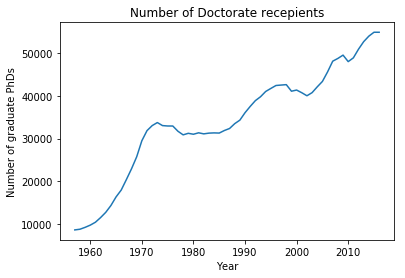

In [10]:
DF = pd.read_excel("tab01.xlsx",skiprows=3,skip_footer=3)
DF = DF.iloc[:,:3]
DF.rename(columns = {'Doctorate recipients':'N_PHD'},inplace=True)

plt.plot(DF.Year, DF.N_PHD)
plt.ylabel("Number of graduate PhDs")
plt.xlabel("Year")
plt.title("Number of Doctorate recepients")
plt.show()

# Top PhD granting Universities

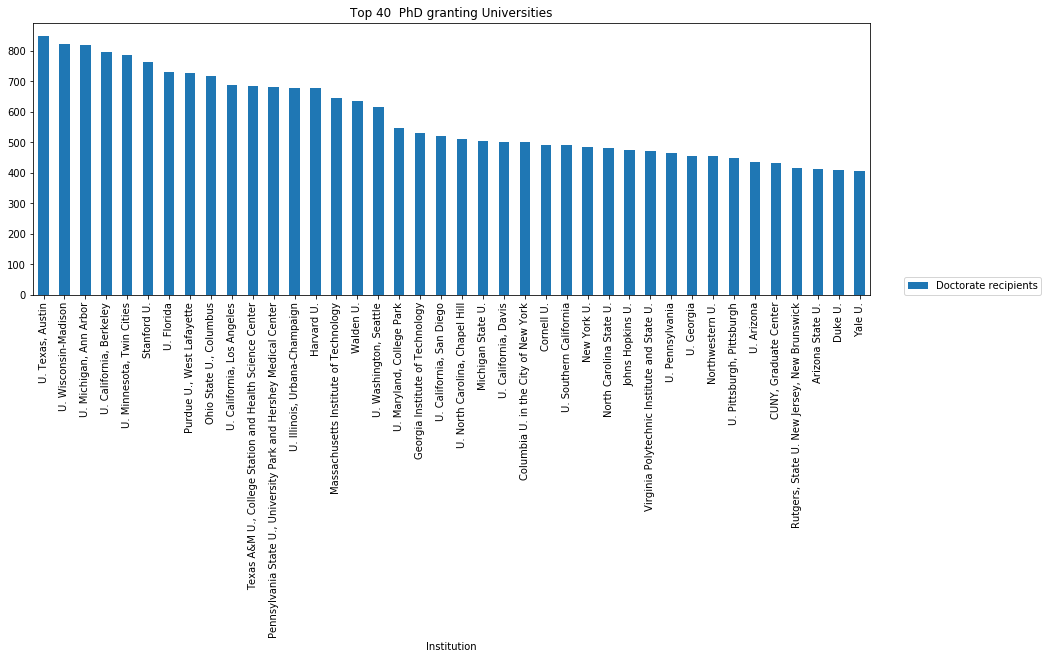

In [13]:
DF = pd.read_excel("tab03.xlsx",skiprows=3,skip_footer=3,index_col=1)
DF = DF.iloc[:,:2]
DF.drop('Rank', axis=1, inplace=True)
DF = DF.iloc[:40]

# plot
plt.rcParams["figure.figsize"] = [15,5]
DF.plot.bar()
plt.legend(loc=(1.04,0))
plt.title("Top 40  PhD granting Universities")
plt.show()
reset_fig()

# Number of PhDs for different fields


In [11]:
DF = pd.read_excel("tab12.xlsx",skiprows=3,skip_footer=10,header=[0,1])
# select subjects
subjects = ['Biological and biomedical sciences','Computer and information sciences','Mathematics and statistics',\
           'Psychology and social sciences','Chemistry','Physics and astronomy',\
           'Electrical, electronics, and communications engineering','Mechanical engineering']
DF = DF.loc[subjects,:]

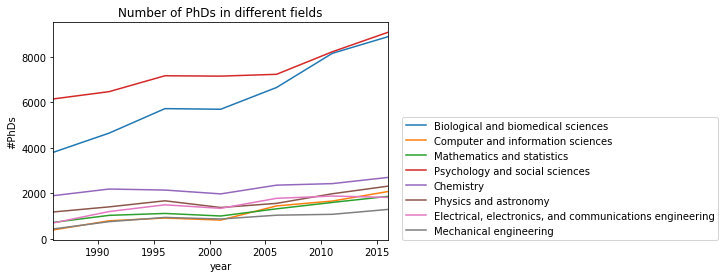

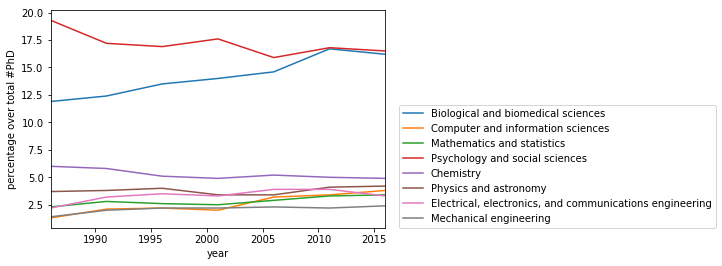

In [12]:
# plot total numbers
newDF = DF.loc[:,(slice(None),'Number')]
years = list(newDF.columns.get_level_values(0))
newDF.columns = newDF.columns.droplevel(level =1)
t = newDF.transpose()
col_line_plot(t,ylab ='#PhDs',xlab='year')
plt.title("Number of PhDs in different fields")
plt.show()

# plot percentage
newDF = DF.loc[:,(slice(None),'Percent')]
newDF *= 100
years = list(newDF.columns.get_level_values(0))
newDF.columns = newDF.columns.droplevel(level =1)
t = newDF.transpose()
col_line_plot(t,ylab ='percentage over total #PhD',xlab='year')
plt.show()

# Male/Female in different fields (2006 - 2016)

In [13]:
# load gender data
DF = pd.read_excel("tab15.xlsx",skiprows=3,skip_footer=6,header=[0],index_col=None)
# select subjects
subjects = ['Biological and biomedical sciences','Computer and information sciences','Mathematics and statistics',\
           'Psychology and social sciences','Chemistry','Physics and astronomy','Economics',\
           'Electrical, electronics, and communications engineering','Mechanical engineering']
sele = DF.iloc[:,0].apply(lambda x: x in subjects) 
DF = DF.loc[sele,:]

# Male table
Male_tab = DF.iloc[range(9,18)]
Male_tab = Male_tab.drop(DF.columns[-1],axis=1)
Male_tab.set_index(Male_tab.columns[0],inplace=True)


# Female table
Female_tab = DF.iloc[range(18,27)]
Female_tab = Female_tab.drop(DF.columns[-1],axis=1)
Female_tab.set_index(Female_tab.columns[0],inplace=True)

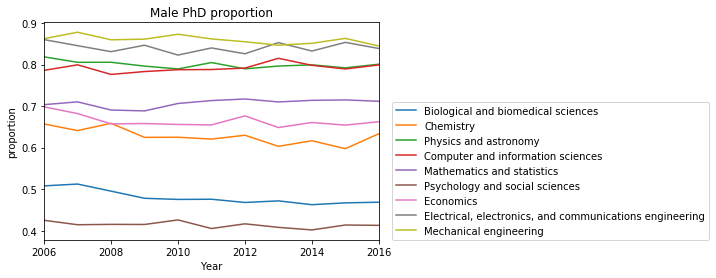

In [15]:
# ratio matrix
Rmat = Male_tab / (Male_tab+Female_tab)
Rmat = Rmat.transpose() 
Rmat.index.name = 'Year'
col_line_plot(Rmat, ylab='proportion')
plt.title("Male PhD proportion")
plt.show()

# Male/Female ratio in different fields (1986 - 2016)

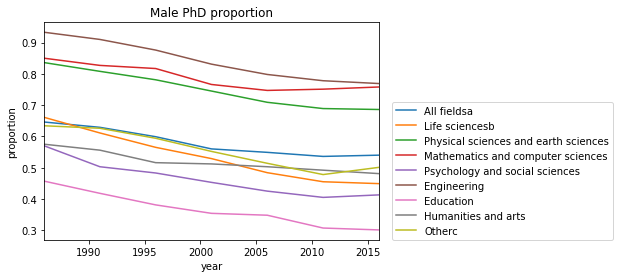

In [16]:
# load gender data
DF = pd.read_excel("tab14.xlsx",skiprows=3,skip_footer=5,header=[0,1])

# percent plot
newDF = DF.loc[:,(slice(None),'Percent')]
newDF.columns = newDF.columns.droplevel(level =1)
N = newDF.shape[0]
fields = newDF.index[range(0,N,3)]
sele = newDF.index.values == 'Male'
temp = newDF.loc[sele].copy()
temp.index = fields
temp = temp.transpose()
temp.index.name ='year'

col_line_plot(temp,ylab = 'proportion')
plt.title("Male PhD proportion")
plt.show()

# Visa holder/citizen

In [17]:
# load citizenship data
DF = pd.read_excel("tab18.xlsx",skiprows=3,skip_footer=6,header=[0],index_col=None)
# groups
groups = ['U.S. citizen or permanent resident','Temporary visa holder']
# select subjects
subjects = ['Biological and biomedical sciences','Computer and information sciences','Mathematics and statistics',\
           'Psychology and social sciences','Chemistry','Physics and astronomy','Economics',\
           'Electrical, electronics, and communications engineering','Mechanical engineering']

sele = DF.iloc[:,0].apply(lambda x: x in subjects or x in groups) 
DF = DF.loc[sele,:]

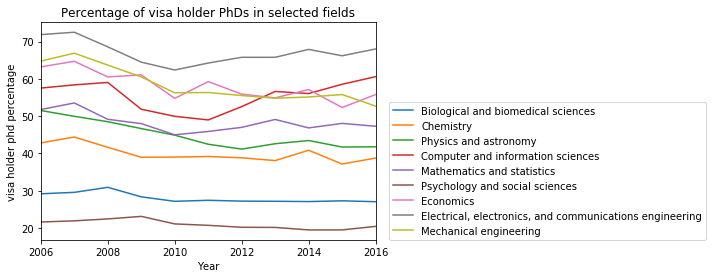

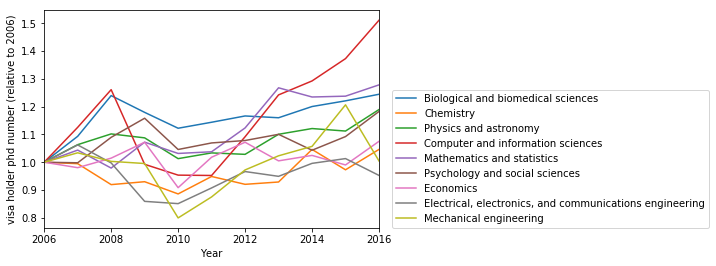

In [18]:
out = split_data(DF, groups)

# visa holder matrix
visa = out['Temporary visa holder'].copy()
visa.set_index('Citizenship status and major field of study',inplace=True)
visa.drop(visa.columns[-1],axis=1,inplace=True)
visa = visa.transpose()

#  citizen
citizen = out['U.S. citizen or permanent resident'].copy()
citizen.set_index('Citizenship status and major field of study',inplace=True)
citizen.drop(citizen.columns[-1],axis=1,inplace=True)
citizen = citizen.transpose()

# visa holder ratio
Rmat = visa*100/(visa+citizen)
Rmat.index.name = 'Year'
col_line_plot(Rmat, ylab ='visa holder phd percentage')
plt.title('Percentage of visa holder PhDs in selected fields')
plt.show()

# number of visa holders, use 2006 as baseline
temp = visa/visa.iloc[0,:]
col_line_plot(temp,ylab = 'visa holder phd number (relative to 2006)')
plt.show()



# top visa countries (in science and engineering)

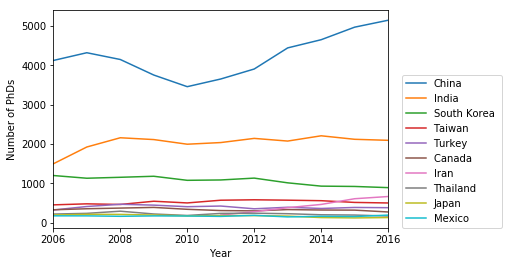

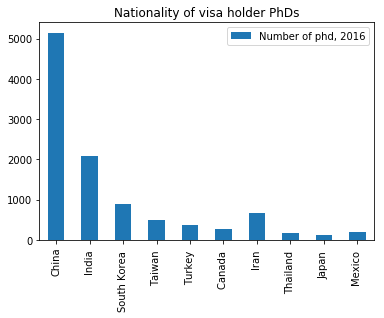

In [19]:
# load citizenship data
DF = pd.read_excel("tab26.xlsx",skiprows=3,skip_footer=4,header=[0],index_col=None)
DF.iloc[:,0].replace('Chinaa','China',inplace=True)
N = DF.shape[0]

# groups
countries = list(DF.iloc[:,0].iloc[range(0,N,3)])

# select subjects
subjects = ['Science and engineering']
sele = DF.iloc[:,0].apply(lambda x: x in subjects) 
DF = DF.loc[sele,:]
DF.drop(DF.columns[0],axis=1,inplace=True)
DF.index = countries
DF = DF.transpose()
DF.index.name = 'Year'

# Iran has missing
DF['Iran '].replace('D',np.nan,inplace=True)

# number of phds
col_line_plot(DF,ylab = 'Number of PhDs')
plt.show()

# relative number of phd (2016)
ct2016 = DF.iloc[-1,:].to_frame(name='Number of phd, 2016')
ct2016.plot.bar()
plt.title("Nationality of visa holder PhDs")
plt.show()




# Years to finish phd

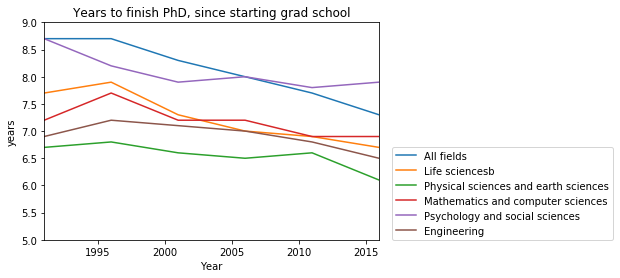

In [20]:
# load citizenship data
DF = pd.read_excel("tab31.xlsx",skiprows=3,skip_footer=6,header=[0],index_col=None)
DF = DF.iloc[:,:7]
DF.replace('na',np.nan,inplace=True)
N = DF.shape[0]

# groups
groups = list(DF.iloc[:,0].iloc[range(0,N,4)])


# select rows
rows = ['Since starting graduate school']
sele = DF.iloc[:,0].apply(lambda x: x in rows) 
DF1 = DF.loc[sele,:].copy()
DF1.drop(DF1.columns[0],axis=1,inplace=True)
DF1.index= groups
DF1 = DF1.transpose()
DF1.index.name = 'Year'

DF1 = DF1.loc[:,DF1.iloc[0]<9]

# years to finish phd, since staring grad school
col_line_plot(DF1,ylab = 'years')
plt.ylim([5,9])
plt.title("Years to finish PhD, since starting grad school")
plt.show()


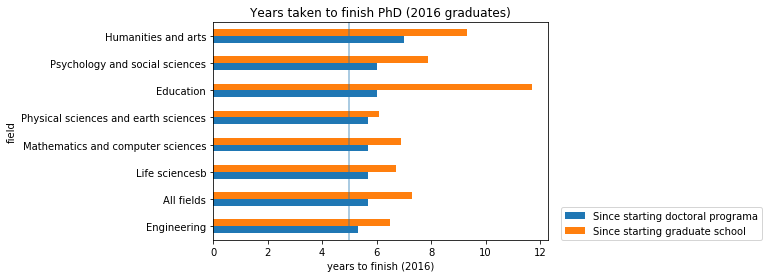

In [21]:
# years to finish phd 2016
rows = ['Since starting graduate school','Since starting doctoral programa']
sele = DF.iloc[:,0].apply(lambda x: x in rows) 
DF2 = DF.loc[sele,:].copy()
DF2.rename(columns={"Field of study and time to degree":'time to degree'},inplace=True)
DF2 = DF2.loc[:,['time to degree',2016]]
groups2 = []
for g in groups:
    groups2 += [g]*2
DF2['field'] = groups2
DF2 = DF2.pivot_table(values=2016, index='field', columns='time to degree')
DF2.drop('Otherc',inplace=True)
DF2.sort_values(by='Since starting doctoral programa',inplace=True)

# plot
DF2.plot.barh()
plt.legend(loc=(1.04,0))
plt.xlabel('years to finish (2016)')
plt.axvline(x=5,alpha=0.5)
plt.title("Years taken to finish PhD (2016 graduates)")
plt.show()



# Where do they go after gradutation?

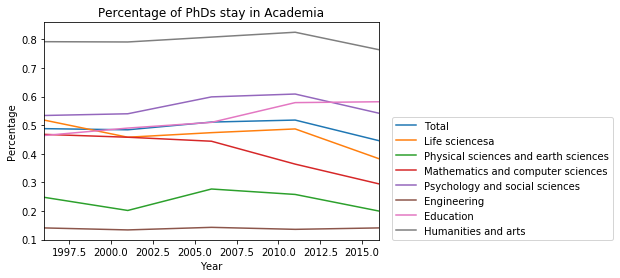

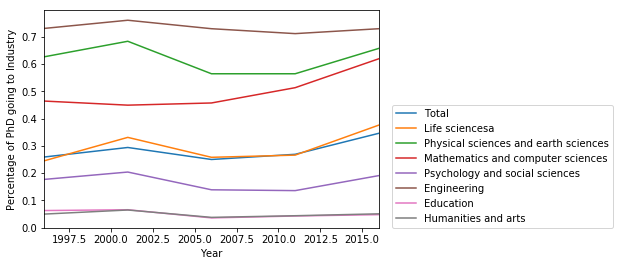

In [22]:
# load citizenship data
DF = pd.read_excel("tab46.xlsx",skiprows=3,skip_footer=8,header=[0],index_col=None)
DF
N = DF.shape[0]

# groups
groups = list(DF.iloc[:,0].iloc[range(0,N,6)])

# split data
out = split_data(DF, groups)

# academe
acad = out['Academe (%)c'].copy()
acad.drop('Otherb',axis=1,inplace=True)
acad.set_index(acad.columns[0],inplace=True)
acad.index.name = 'Year'

col_line_plot(acad, ylab="Percentage")
plt.title("Percentage of PhDs stay in Academia")
plt.show()

# industry
indus = out['Industry or business (%)c,d'].copy()
indus.drop('Otherb',axis=1,inplace=True)
indus.set_index(indus.columns[0],inplace=True)
indus.index.name = 'Year'
col_line_plot(indus, ylab="Percentage of PhD going to Industry")
plt.show()

# Salary

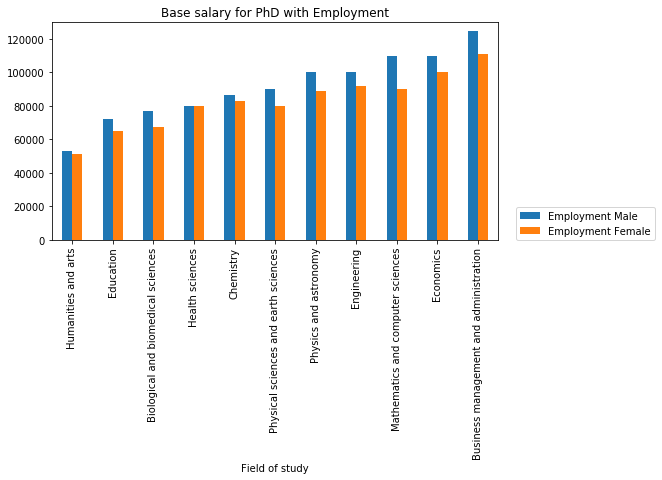

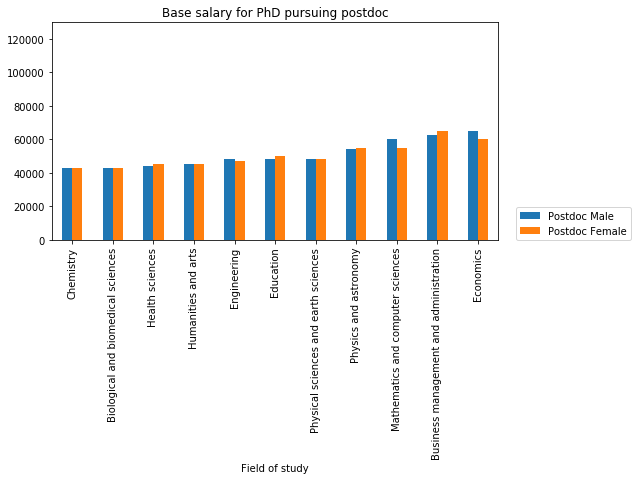

In [23]:
# load citizenship data
DF = pd.read_excel("tab48.xlsx",skiprows=3,skip_footer=6,header=[0],index_col=None)
DF = DF.iloc[:,:5]
DF.drop(DF.index[0],inplace=True)

# subjects
subjects = ['Biological and biomedical sciences','Mathematics and computer sciences',\
           'Health sciences','Chemistry','Physical sciences and earth sciences','Physics and astronomy',\
           'Engineering','Economics','Education','Humanities and arts','Business management and administration']
sele = DF['Field of study'].apply(lambda x: x in subjects)
DF = DF.loc[sele]
DF.set_index(DF.columns[0],inplace=True)
DF.columns = ['Employment Male','Employment Female', 'Postdoc Male', 'Postdoc Female']


# employment
temp = DF.iloc[:,:2].copy()
temp.sort_values(by = 'Employment Male',inplace=True)
plt.rcParams["figure.figsize"] = [8,4]
temp.plot.bar()
plt.legend(loc=(1.04,0))
plt.ylim([0,130000])
plt.title("Base salary for PhD with Employment")
plt.show()


# postdoc
temp = DF.iloc[:,2:].copy()
temp.sort_values(by = 'Postdoc Male',inplace=True)
temp.plot.bar()
plt.legend(loc=(1.04,0))
plt.title("Base salary for PhD pursuing postdoc")
plt.ylim([0,130000])
plt.show()
reset_fig()




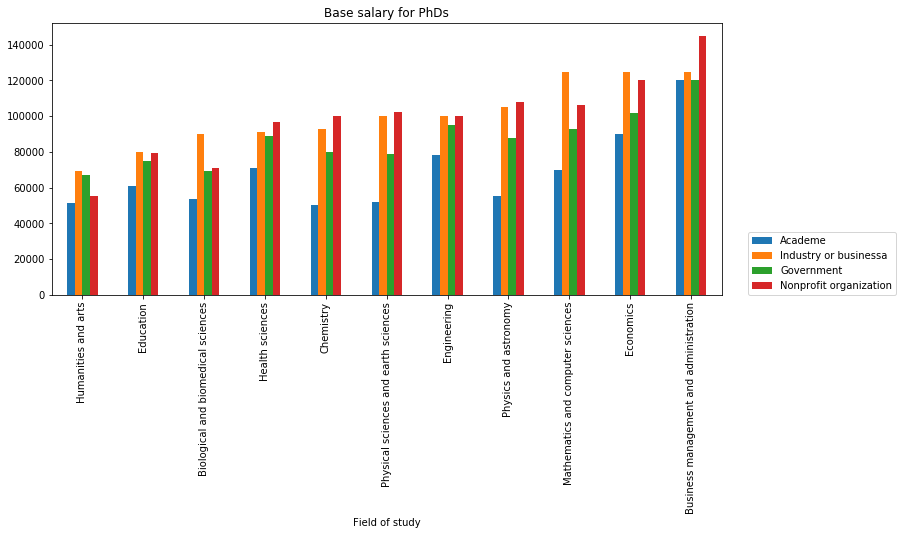

In [24]:
# load citizenship data
DF = pd.read_excel("tab49.xlsx",skiprows=3,skip_footer=9,header=[0],index_col=None)
DF = DF.iloc[:,:6]
DF.replace('D',np.nan,inplace=True)

# subjects
subjects = ['Biological and biomedical sciences','Mathematics and computer sciences',\
           'Health sciences','Chemistry','Physical sciences and earth sciences','Physics and astronomy',\
           'Engineering','Economics','Education','Humanities and arts','Business management and administration']
sele = DF['Field of study'].apply(lambda x: x in subjects)
DF = DF.loc[sele]
DF.set_index(DF.columns[0],inplace=True)
DF.drop(DF.columns[-1], axis = 1,inplace=True)

DF.sort_values(by = 'Industry or businessa',inplace=True)

# salary in different employment sector
plt.rcParams["figure.figsize"] = [12,5]
DF.plot.bar()
plt.legend(loc=(1.04,0))
plt.title("Base salary for PhDs")
plt.show()
reset_fig()


